In [15]:
import os
import pandas as pd
from collections import Counter
from collections import defaultdict

# Define the directory where the files are located
data_dir = "data"

# List all files in the directory
all_files = os.listdir(data_dir)

# Get file extensions and count them
file_extensions = [os.path.splitext(f)[1] for f in all_files]
file_count = Counter(file_extensions)

# Display count of files for each type
print("Count of files for each type:")
for ext, count in file_count.items():
    print(f"{ext}: {count}")


Count of files for each type:
.csv: 18
: 1
.xlsx: 1


In [16]:
# Filter out only the CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Initialize a dictionary to store column sets for each file
column_dict = {}

# Loop through each CSV file to collect its columns
for csv_file in csv_files:
    file_path = os.path.join(data_dir, csv_file)
    df = pd.read_csv(file_path)
    column_dict[csv_file] = set(df.columns)

# Initialize a dictionary to store common keys between files
common_key_dict = {}

# Loop through each CSV file to find common keys with other files
for csv_file in csv_files:
    common_key_dict[csv_file] = {}
    for other_file, other_columns in column_dict.items():
        if csv_file != other_file:
            common_keys = column_dict[csv_file].intersection(other_columns)
            if common_keys:
                common_key_dict[csv_file][other_file] = list(common_keys)

# Initialize a dictionary to keep track of files where each key appears
key_file_dict = defaultdict(set)

# Loop through the common_key_dict to identify the files where each key appears
for file, relations in common_key_dict.items():
    for other_file, common_keys in relations.items():
        for key in common_keys:
            key_file_dict[key].add(file)
            key_file_dict[key].add(other_file)

# Find keys that appear in more files than expected
for key, files in key_file_dict.items():
    if len(files) > 17:  # Replace 17 with the actual number of CSV files if different
        print(f"The key '{key}' appears in more than 17 files: {files}")

# To find the most common key without duplicates
most_common_key = max(key_file_dict, key=lambda k: len(key_file_dict[k]))

print(f"The most common key without duplicates is '{most_common_key}' and it appears in {len(key_file_dict[most_common_key])} files.")


The most common key without duplicates is 'id' and it appears in 13 files.


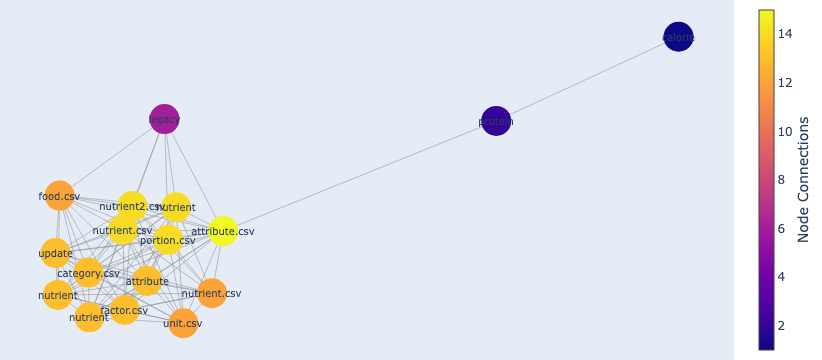

In [17]:
import plotly.graph_objects as go
import networkx as nx

# Initialize a NetworkX graph
G = nx.Graph()

# Add edges to the graph and set attributes
for file, relations in common_key_dict.items():
    for other_file, common_keys in relations.items():
        num_common_keys = len(common_keys)
        G.add_edge(file, other_file, weight=num_common_keys, label=", ".join(common_keys))

# Generate positions for the nodes
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility

# Initialize variables
edge_x = []
edge_y = []
edge_text = []
annotations = []

# Extract positions, edges, and labels
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_text.append(G.edges[edge]['label'])

node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

# Create annotations for brief descriptions
for node in G.nodes():
    brief_description = node.split('_')[1] if '_' in node else node
    annotations.append(
        dict(
            x=pos[node][0],
            y=pos[node][1],
            xref="x",
            yref="y",
            text=brief_description,
            showarrow=False,
            font=dict(size=10)
        )
    )


# Create annotations for brief descriptions
annotations = []
for node in G.nodes():
    brief_description = node.split('_')[1] if '_' in node else node  # Extract words before the second underscore
    annotations.append(
        dict(
            x=pos[node][0],
            y=pos[node][1],
            xref="x",
            yref="y",
            text=brief_description,
            showarrow=False,
            font=dict(size=10)
        )
    )

# Create the plot
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='text',
    mode='lines'
)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        size=30,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f"{adjacencies[0]} - # of connections: {len(adjacencies[1])}")

node_trace.marker.color = node_adjacencies
node_trace.text = node_text
edge_trace.text = edge_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                showlegend=False,
                hovermode='closest',
                margin=dict(b=0, l=0, r=0, t=0),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                annotations=annotations  # Add annotations
                )
                )

fig.show()


In [18]:
# Given common key
given_key = 'fdc_id'

# Find the files that contain the given common key
if given_key in key_file_dict:
    files_with_given_key = key_file_dict[given_key]
    print(f"The key '{given_key}' appears in the following files: {files_with_given_key}")
else:
    print(f"The key '{given_key}' does not appear in any file.")

The key 'fdc_id' appears in the following files: {'food_attribute.csv', 'food_nutrient2.csv', 'food_nutrient_conversion_factor.csv', 'food.csv', 'food_nutrient.csv', 'food_portion.csv', 'sr_legacy_food.csv'}


In [19]:
# File to look for
file_name = "food_nutrient2.csv"

# Check if the file exists in the directory
if file_name in all_files:
    # Construct the full path to the file
    full_file_path = os.path.join(data_dir, file_name)
    
    # Load the CSV file into a DataFrame
    df = pd.read_csv(full_file_path)
    row_count = len(df)
    
    # Preview file
    print(f"Total number of rows: {row_count}")
    print(df.head(3)) 
else:
    print(f"The file {file_name} does not exist in the directory {data_dir}.")


Total number of rows: 33
   id  fdc_id  nutrient_id  amount  data_points  derivation_id  min  max  \
0 NaN    1001         1176    23.0          NaN            NaN  NaN  NaN   
1 NaN    1001         1005    15.0          NaN            NaN  NaN  NaN   
2 NaN    1001         1178   108.0          NaN            NaN  NaN  NaN   

   median  footnote  min_year_acquired        label_name  
0     NaN       NaN                NaN       Biotin (B7)  
1     NaN       NaN                NaN  Carbohydrate (g)  
2     NaN       NaN                NaN   Cobalamin (B12)  


In [21]:
# Filter for rows where 'fdc_id' is a specific value, for example, 123456
filtered_df = df[df['fdc_id'] == 1001]

# Count the number of rows in the filtered DataFrame
filtered_row_count = len(filtered_df)

# Preview the filtered DataFrame
print(f"Total number of rows after filtering: {filtered_row_count}")
print(filtered_df.head())


Total number of rows after filtering: 16
   id  fdc_id  nutrient_id  amount  data_points  derivation_id  min  max  \
0 NaN    1001         1176    23.0          NaN            NaN  NaN  NaN   
1 NaN    1001         1005    15.0          NaN            NaN  NaN  NaN   
2 NaN    1001         1178   108.0          NaN            NaN  NaN  NaN   
3 NaN    1001         1008   335.8          NaN            NaN  NaN  NaN   
4 NaN    1001         1062  1407.0          NaN            NaN  NaN  NaN   

   median  footnote  min_year_acquired        label_name  
0     NaN       NaN                NaN       Biotin (B7)  
1     NaN       NaN                NaN  Carbohydrate (g)  
2     NaN       NaN                NaN   Cobalamin (B12)  
3     NaN       NaN                NaN            Energy  
4     NaN       NaN                NaN       Energy (kj)  


In [14]:
# Loop through each CSV file again to preview the first 2 rows and show additional info
for csv_file in [f for f in all_files if f.endswith('.csv')]:
    file_path = os.path.join(data_dir, csv_file)
    df = pd.read_csv(file_path)
    
    # Preview the DataFrame
    print(f"\033[95mPreview of {csv_file}:\033[0m")
    print(f"Number of rows: {len(df)}")
    print("-"*80)
    print(df.head(2))
    print(" "*50)
    
    # Separator
    print("="*80)


Preview of food_calorie_conversion_factor.csv:
Number of rows: 4693
--------------------------------------------------------------------------------
   food_nutrient_conversion_factor_id  protein_value  fat_value  \
0                               11672            4.0        9.0   
1                               11673            4.0        9.0   

   carbohydrate_value  
0                 4.0  
1                 4.0  
                                                  
Preview of food_nutrient_derivation.csv:
Number of rows: 64
--------------------------------------------------------------------------------
   id code                                        description  source_id
0   1    A                                         Analytical          1
1   2   AI  Analytical data; from the literature or  gover...         10
                                                  
Preview of food_nutrient2.csv:
Number of rows: 35
-----------------------------------------------------------------